Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 266 images belonging to 5 classes.
Found 62 images belonging to 5 classes.
Epoch 1/10
8/8 [==============================] - 32s 4s/step - loss: 1.6843 - accuracy: 0.2778 - val_loss: 1.5715 - val_accuracy: 0.3750
Epoch 2/10
8/8 [==============================] - 28s 3s/step - loss: 1.4629 - accuracy: 0.3761 - val_loss: 1.4802 - val_accuracy: 0.2812
Epoch 3/10
8/8 [==============================] - 19s 2s/step - loss: 1.1730 - accuracy: 0.5085 - val_loss: 1.1863 - val_accuracy: 0.5000
Epoch 4/10
8/8 [==============================] - 19s 2s/step - loss: 1.0574 - accuracy: 0.5342 - val_loss: 1.2159 - val_accuracy: 0.5312
Epoch 5/10
8/8 [==============================] - 20s 2s/step - loss: 0.7325 - accuracy: 0.7422 - val_loss: 1.2422 - val_accuracy: 0.5625
Epoch 6/10
8/8 [==============================] - 20s 2s/step - loss: 0.5443 - accuracy: 0.8077 - va

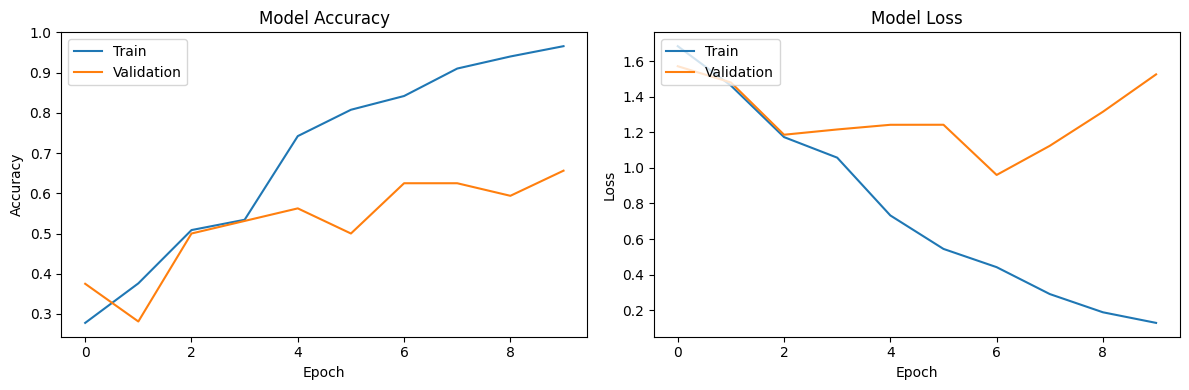

In [6]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define constants
IMAGE_WIDTH = 150
IMAGE_HEIGHT = 150
BATCH_SIZE = 32
EPOCHS = 10
NUM_CLASSES = 5
BASE_DIR = '/content/drive/MyDrive/DataSet/flowers'

# Data preprocessing
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

data_generator = datagen.flow_from_directory(
    BASE_DIR,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training')  # set as training data

validation_generator = datagen.flow_from_directory(
    BASE_DIR,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation')  # set as validation data

# Model building
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model training with history
history = model.fit(data_generator,
                    steps_per_epoch=data_generator.samples // BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // BATCH_SIZE)

# Evaluate the model
loss, accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // BATCH_SIZE)
print("Validation Accuracy:", accuracy)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [5]:
model.save('/content/drive/MyDrive/flower.h5')

# Convert the Keras model to TensorFlow Lite model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model
tflite_model_path = '/content/drive/MyDrive/flower.tflite'
with open(tflite_model_path, 'wb') as f:
    f

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
